### Step 1: Implement Fibonacci Functions
#### We'll create four variations of the Fibonacci function using different algorithms.

In [1]:
#Recursive Fibonacci (Naive)
def fibonacciRecursive(n):
    if n <= 1:
        return n
    else:
        return fibonacciRecursive(n - 1) + fibonacciRecursive(n - 2)

#Iterative Fibonacci
def fibonacciIterative(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

#Memoization (Top-down)
def fibonacciMemoization(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fibonacciMemoization(n - 1, memo) + fibonacciMemoization(n - 2, memo)
    return memo[n]

#Matrix Exponentiation (Fast Doubling)
import numpy as np

def fibonacciMatrix(n):
    if n <= 0:
        return 0
    F = np.array([[1, 1], [1, 0]], dtype=object)
    return np.linalg.matrix_power(F, n - 1)[0, 0]

def fibonacci(n, algo_type):
    try:
        if algo_type == 0:
            return fibonacciRecursive(n)
        elif algo_type == 1:
            return fibonacciMemoization(n)
        elif algo_type == 2:
            return fibonacciIterative(n)
        elif algo_type == 3:
            return fibonacciMatrix(n)
        else:
            raise ValueError('Invalid algo_type. Please use 0, 1, 2, or 3.')
    except RecursionError as e:
        return f'Error: {e}. Recursive algorithm exceeded recursion limit.'
    except Exception as e:
        return f'Error: {e}. An error occurred while calculating Fibonacci.'


### Step 2: Performance Testing
#### Now, create a script to test the performance of these functions and create a dataframe:

In [2]:
import time
import pandas as pd
def run_benchmark(func, n, algo_type):
    start_time = time.time()    
    result = func(n, algo_type)
    end_time = time.time()
    
    execution_time = end_time - start_time
        
    return execution_time

def test_performance(n, algorithm_type):    
    data = []
    for algo_type in algorithm_type.keys():
        execution_time = run_benchmark(fibonacci, n, algo_type)        
        data.append([
            algorithm_type[algo_type], 
            True if algo_type < 2 else False,            
            execution_time])

    df = pd.DataFrame(data, columns=['Algorithm Type', 'Recursive?', f'Execution of Step{n}'])
    return df

def create_performance_df(algorithm_types, limit, step):
    dfs = []
    performace_df = test_performance(0, algorithm_types)
    for n in range(1, limit, step):
      df = test_performance(n, algorithm_types)
      dfs.append(df)
    
    for df in dfs:
      performace_df = performace_df.merge(df, on=['Algorithm Type', 'Recursive?'], how='inner')
    return performace_df
    

### Step 3: Plot Results
#### Now, create a script to plot graphs for the results:

In [3]:
def create_performance_graph(performace_df):
    algorithm_types = performace_df['Algorithm Type'].unique()
    execution_steps = [col for col in performace_df.columns if col.startswith('Execution of Step')]
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    
    for algo_type in algorithm_types:
        algo_df = performace_df[performace_df['Algorithm Type'] == algo_type]
        x_values = [col.replace('Execution of Step', '') for col in execution_steps]
        y_values = algo_df[execution_steps].values.tolist()[0]
        plt.plot(x_values, y_values, marker=None, label=f'Algorithm Type {algo_type}')
    

    plt.xlabel('Execution Steps(n)')
    plt.ylabel('Execution Time(s)')
    plt.title('Algorithm Types vs. Execution Steps')
    plt.legend()

    plt.grid(True)
    plt.show()


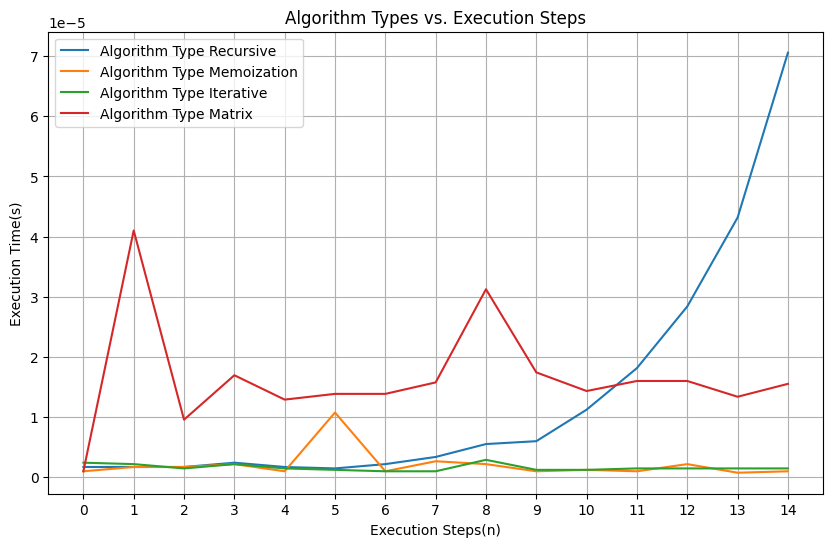

In [4]:
performance_df = create_performance_df(
    algorithm_types={
        0:'Recursive',
        1:'Memoization',
        2:'Iterative',
        3:'Matrix'
    },
    limit=15,
    step=1
)
create_performance_graph(performance_df)

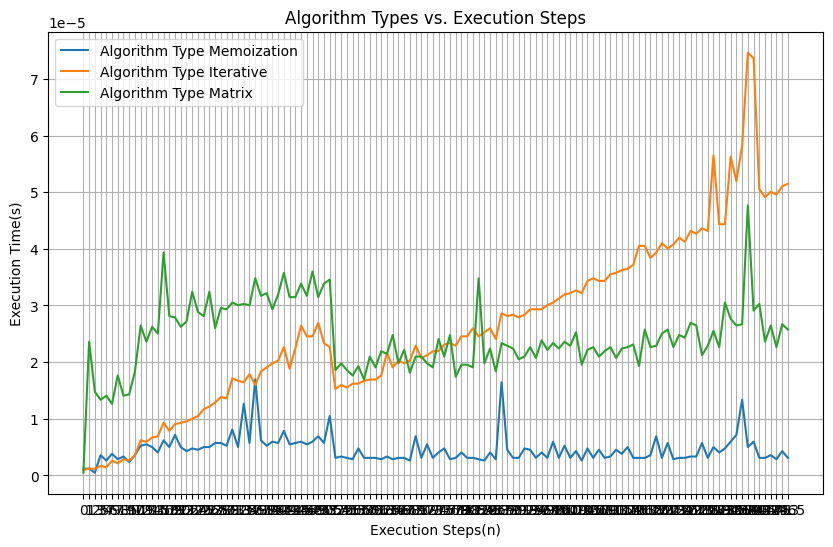

In [5]:
performance_df = create_performance_df(
    algorithm_types={
        1:'Memoization',
        2:'Iterative',
        3:'Matrix'
    },
    limit=1476,
    step=12
)
create_performance_graph(performance_df)

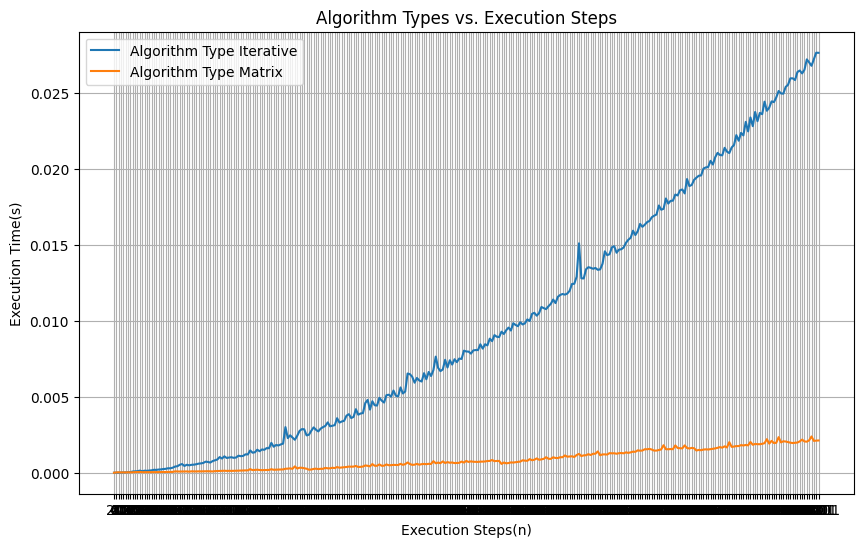

In [6]:
performance_df = create_performance_df(
    algorithm_types={2:'Iterative', 3:'Matrix'},
    limit=60000,
    step=200
)
create_performance_graph(performance_df)

### Step 4: Draw Fibonacci Spiral
#### Now, draw fibonacci spiral using Pyturtle:

In [7]:
import turtle as trt

def drawSquare(fibo_turtle: trt.Turtle, L):
    fibo_turtle.pendown()
    for i in range(4):
        fibo_turtle.pencolor('black')
        fibo_turtle.forward(L)
        fibo_turtle.left(90)
        i=i+1
    fibo_turtle.penup()

def drawSquareArc(fibo_turtle: trt.Turtle, L):      
    drawSquare(fibo_turtle, L)
    fibo_turtle.pencolor('red')
    fibo_turtle.pendown()
    fibo_turtle.circle(L, 90)

    
# Function to draw one curve of Fibonacci spiral
def drawFibonacciSpiral(num_curves, algo_type):
    L = []    
    for i in range(num_curves):
        L.append(fibonacci(i+1, algo_type))
    print(L)
    fibo_turtle = trt.Turtle()
    fibo_turtle.pensize(2)
    fibo_turtle.speed(0)
    fibo_turtle.penup()
    fibo_turtle.goto(0, 0)
    fibo_turtle.pendown()
    for i in L:
        drawSquareArc(fibo_turtle, i)

In [8]:
drawFibonacciSpiral(40, 0)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155]


In [9]:
drawFibonacciSpiral(40, 1)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155]


In [10]:
drawFibonacciSpiral(40, 2)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155]


In [11]:
drawFibonacciSpiral(40, 3)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155]
